In [1]:
# Importing libraries
import pandas as pd 
from tabulate import tabulate
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import geopandas as gpd
import folium
import warnings
import geopy
from geopy.geocoders import Nominatim
import math

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV file
temp_df = pd.read_csv('Mineral ores round the world.csv')

# Slicing df only realted to India
india_df = temp_df[ temp_df['country'] == 'India' ]
india_df.reset_index(inplace= True)
india_df.drop(columns= 'index', inplace= True)

india_df.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Adilabad,22.88286,79.61656,AS,India,NaN,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,NaN,NaN,"Shale,Limestone,Chert",NaN
1,Amatola,21.76615,80.11701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Banjari,21.88280,80.31701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,M,Past Producer,"Braunite, Pyrolusite",NaN,NaN,Jagantola,NaN,"Quartzite,Schist",NaN
4,Barbaspur,21.79947,80.10867,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Summary of the dataframe
print('The Dataframe has {0} Columns and {1} Rows.'.format(len(india_df.columns), len(india_df.index)))
india_df.info()

The Dataframe has 22 Columns and 780 Rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site_name   780 non-null    object 
 1   latitude    780 non-null    float64
 2   longitude   780 non-null    float64
 3   region      780 non-null    object 
 4   country     780 non-null    object 
 5   state       707 non-null    object 
 6   county      0 non-null      object 
 7   com_type    780 non-null    object 
 8   commod1     391 non-null    object 
 9   commod2     25 non-null     object 
 10  commod3     412 non-null    object 
 11  oper_type   780 non-null    object 
 12  dep_type    41 non-null     object 
 13  prod_size   228 non-null    object 
 14  dev_stat    780 non-null    object 
 15  ore         74 non-null     object 
 16  gangue      27 non-null     object 
 17  work_type   47 non-null     object 
 18  names       144 non-null   

In [4]:
# Percentage and No. of NaN values in each columns (Only columns with Nan Values present)
for col_name in india_df.columns:
    
    if india_df[col_name].isna().sum() == 0:
        continue
    else:
        print ( 
            'Column {0} has {1} NaN values or {2} percent'.format( 
            col_name, india_df[col_name].isna().sum(), round(india_df[col_name].isna().mean()*100 ,2)
            )
    )

Column state has 73 NaN values or 9.36 percent
Column county has 780 NaN values or 100.0 percent
Column commod1 has 389 NaN values or 49.87 percent
Column commod2 has 755 NaN values or 96.79 percent
Column commod3 has 368 NaN values or 47.18 percent
Column dep_type has 739 NaN values or 94.74 percent
Column prod_size has 552 NaN values or 70.77 percent
Column ore has 706 NaN values or 90.51 percent
Column gangue has 753 NaN values or 96.54 percent
Column work_type has 733 NaN values or 93.97 percent
Column names has 636 NaN values or 81.54 percent
Column ore_ctrl has 765 NaN values or 98.08 percent
Column hrock_type has 706 NaN values or 90.51 percent
Column arock_type has 764 NaN values or 97.95 percent


**GETTING MISSING STATES NAME THROUGH GEOENCODING**

In [5]:
geolocator = Nominatim(user_agent="geoapiExercises")

for index, (lat,lon) in enumerate(zip( india_df.latitude, india_df.longitude)):
    
    location = geolocator.reverse(str(lat)+ ',' +str(lon))
    address = location.raw['address']
    state = address.get('state', '')

    india_df.loc[ index, 'state'] = state

india_df.head()

,site_name,latitude,longitude,region,country,state,county,com_type,commod1,commod2,...,dep_type,prod_size,dev_stat,ore,gangue,work_type,names,ore_ctrl,hrock_type,arock_type
0,Adilabad,22.88286,79.61656,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,NaN,NaN,"Shale,Limestone,Chert",NaN
1,Amatola,21.76615,80.11701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Banjari,21.88280,80.31701,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banjartola,21.95779,80.27534,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,M,Past Producer,"Braunite, Pyrolusite",NaN,NaN,Jagantola,NaN,"Quartzite,Schist",NaN
4,Barbaspur,21.79947,80.10867,AS,India,Madhya Pradesh,NaN,M,Manganese,NaN,...,NaN,N,Occurrence,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Removing unnecessary rows
#cond = india_df['state'] == 'ولاية غرب دارفور'
india_df.drop(index= 496, inplace= True)

#cond= india_df['state'] == ''
india_df.loc[212, 'state'] = 'Andhra Pradesh'
india_df.loc[230, 'state'] = 'Karnataka'
india_df.drop(index= 393, inplace= True)

In [7]:
# Chcecking if NaN value still exists or not
india_df['state'].isna().any()

False

In [8]:
# Getting states name
india_df['state'].unique()

array(['Madhya Pradesh', 'Goa', 'Maharashtra', 'Andhra Pradesh', 'Odisha',
       'Karnataka', 'West Bengal', 'Telangana', 'Bihar', 'Tamil Nadu',
       'Rajasthan', 'Gujarat', 'Jharkhand', 'Arunachal Pradesh',
       'Uttar Pradesh', 'Chhattisgarh', 'Kerala', 'Jammu and Kashmir',
       'Andaman and Nicobar Islands', 'Haryana', 'Himachal Pradesh',
       'Uttarakhand', 'Manipur', 'Ladakh', 'Nagaland'], dtype=object)

In [9]:
# Dropping unnecessary columns
india_df.drop( columns= ['county','region', 'prod_size', 'ore_ctrl', 'country','names'], inplace= True)

india_df.head()

,site_name,latitude,longitude,state,com_type,commod1,commod2,commod3,oper_type,dep_type,dev_stat,ore,gangue,work_type,hrock_type,arock_type
0,Adilabad,22.88286,79.61656,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,"Birnessite, Braunite, Pyrolusite, Todorokite",Quartz,NaN,"Shale,Limestone,Chert",NaN
1,Amatola,21.76615,80.11701,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN
2,Banjari,21.88280,80.31701,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN
3,Banjartola,21.95779,80.27534,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Past Producer,"Braunite, Pyrolusite",NaN,NaN,"Quartzite,Schist",NaN
4,Barbaspur,21.79947,80.10867,Madhya Pradesh,M,Manganese,NaN,NaN,Unknown,NaN,Occurrence,NaN,NaN,NaN,NaN,NaN


**STATE WISE COMMODITIES LIST**

In [10]:
# First lets create a duplicate datafraem containing states and commodities column only
india_df_commod = india_df.loc[ : , ['state', 'commod1', 'commod2', 'commod3']]

# Removing rows with NaN state value
india_df_commod.dropna( subset = ['state'],axis= 0, inplace= True)

# List of State 
state_list = india_df_commod['state'].unique()

Dicts = [ ]
temp_commd_list = []

for index in range(len(state_list)):

    lst =[]
    temp_list = []
    new_list = []
    flat_list = []
    flat_list_final = []

    state_name = state_list[index]
    x = india_df_commod['state'] == state_list[index]
    ex = india_df_commod[x].drop_duplicates()

    for index, row in ex.iterrows():
        lst.append(row['commod1'])
        lst.append(row['commod2'])
        lst.append(row['commod3'])

    for item in lst:
        if str(item) != 'nan':
            new_list.append(item)
    new_list

    
    for items in new_list:
        if ',' in items:
            temp_list.append(items.split(','))
        else:
            temp_list.append(items)
    temp_list

    for element in temp_list:
        if type(element) is list:
            # do split and append
            for inside_el in element:
                flat_list.append(inside_el)
        else:
            # do only append
            flat_list.append(element)

    for l in range (len(flat_list)):
       temp_commd_list.append(flat_list[l])

    
    for var in flat_list:
        flat_list_final.append(var.strip())

    d = {'State': state_name, 'Commodities Present' : list(set(flat_list_final))}
   
    Dicts.append(d) 

    del lst ,temp_list ,new_list ,flat_list ,flat_list_final

In [11]:
state_mineral_df = pd.DataFrame(Dicts)

print(tabulate(state_mineral_df, headers= ['STATE', 'COMMODITIES PRESENT'], tablefmt= 'grid', showindex= False))

+-----------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| STATE                       | COMMODITIES PRESENT                                                                                                                                                                                                                                                                                                         |
+=============================+=============================================================================================================================================================================================================================================================================

**STATE WISE TOTAL NO OF COMMODITIES**

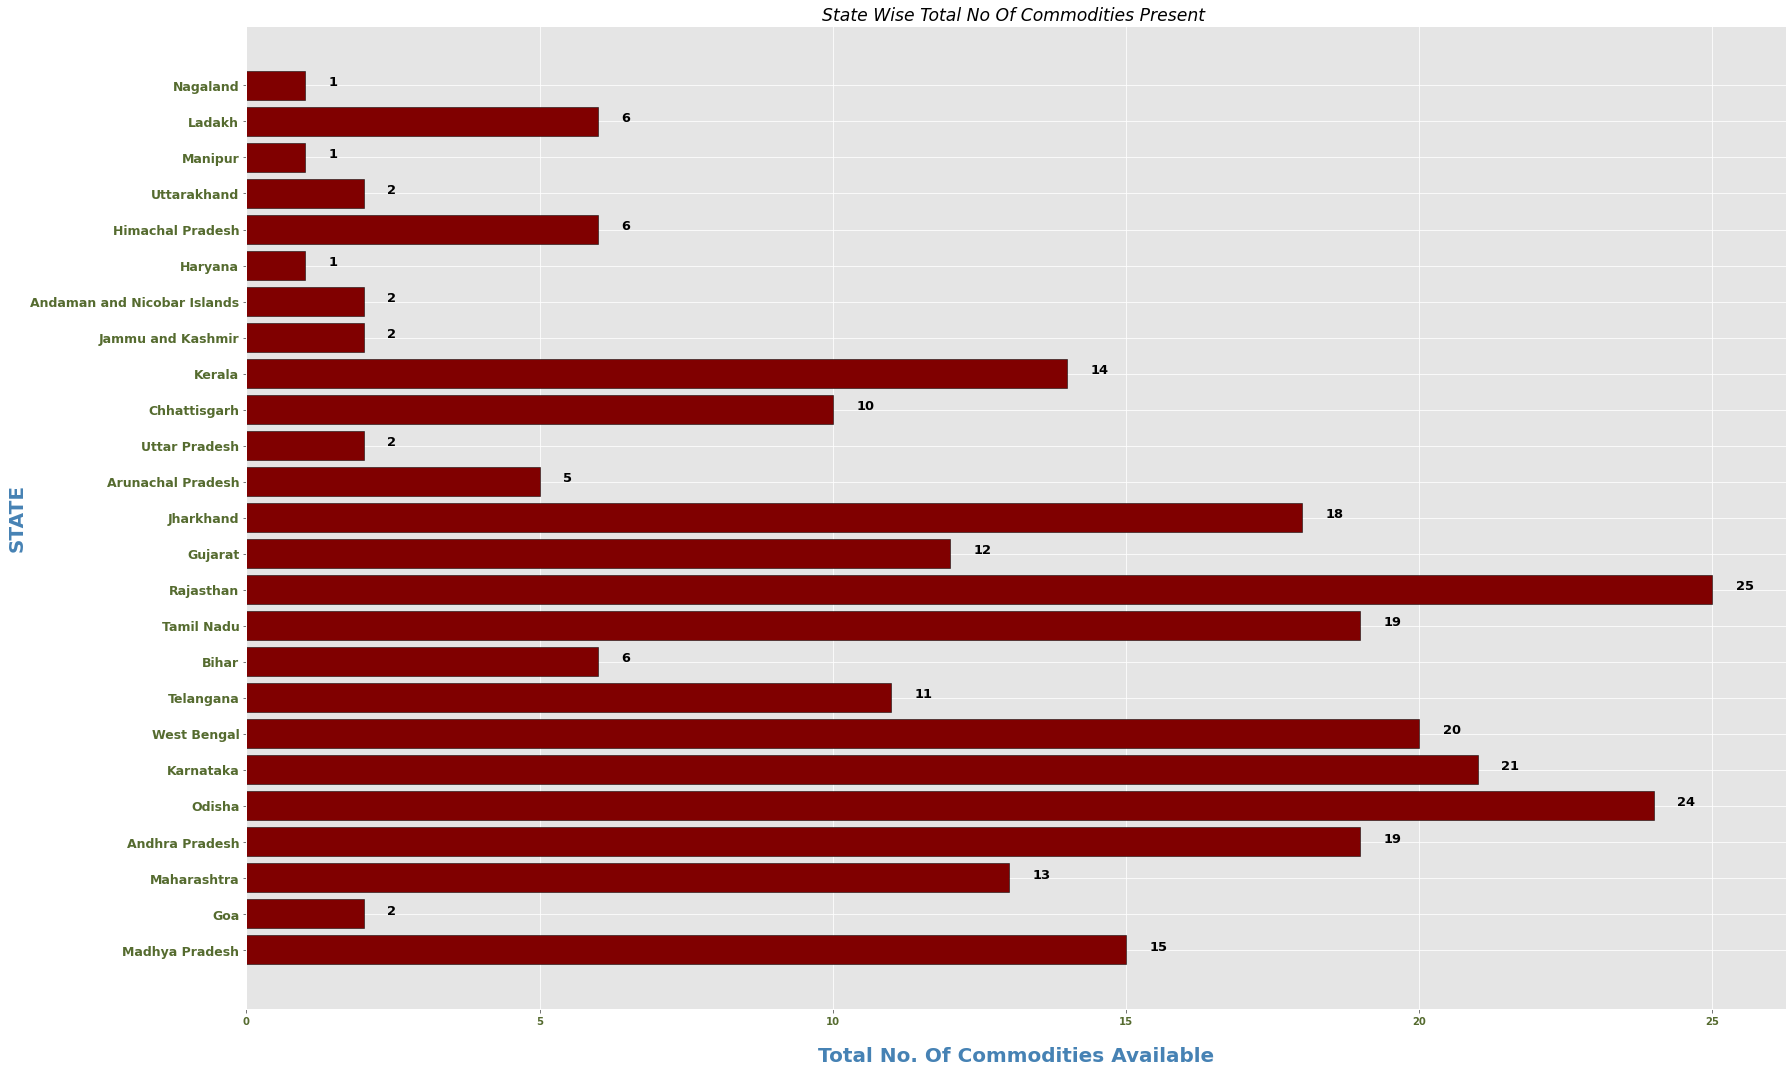

In [12]:
fig = plt.figure( figsize= (25,15))

total_commodities = []

for df_len in range(len(state_mineral_df)):
    total_commodities.append(len(state_mineral_df.loc[ df_len, 'Commodities Present']))

plt.barh( y= state_mineral_df['State'], width= total_commodities, color = 'maroon', edgecolor= 'black')

# Figure customization
plt.ylabel('STATE', color = 'steelblue', fontweight ='bold', fontsize = 20)
plt.xlabel('Total No. Of Commodities Available', color = 'steelblue', fontweight ='bold', fontsize = 20, labelpad= 20)
plt.title('State Wise Total No Of Commodities Present ', fontsize = 'xx-large', fontstyle =  'italic')

plt.yticks(color = 'darkolivegreen', fontsize= 12.5, fontweight = 'bold' )
plt.xticks(color = 'darkolivegreen', fontsize= 10, fontweight = 'bold' )

for index, val in enumerate(total_commodities):
    plt.annotate(text= val, xy= (int(val)+0.4, index), 
                fontsize = 13, fontweight ='bold',
                color ='black' )

plt.tight_layout()
plt.show()


**TOP 10 STATES BY NO. OF COMMODITIES**

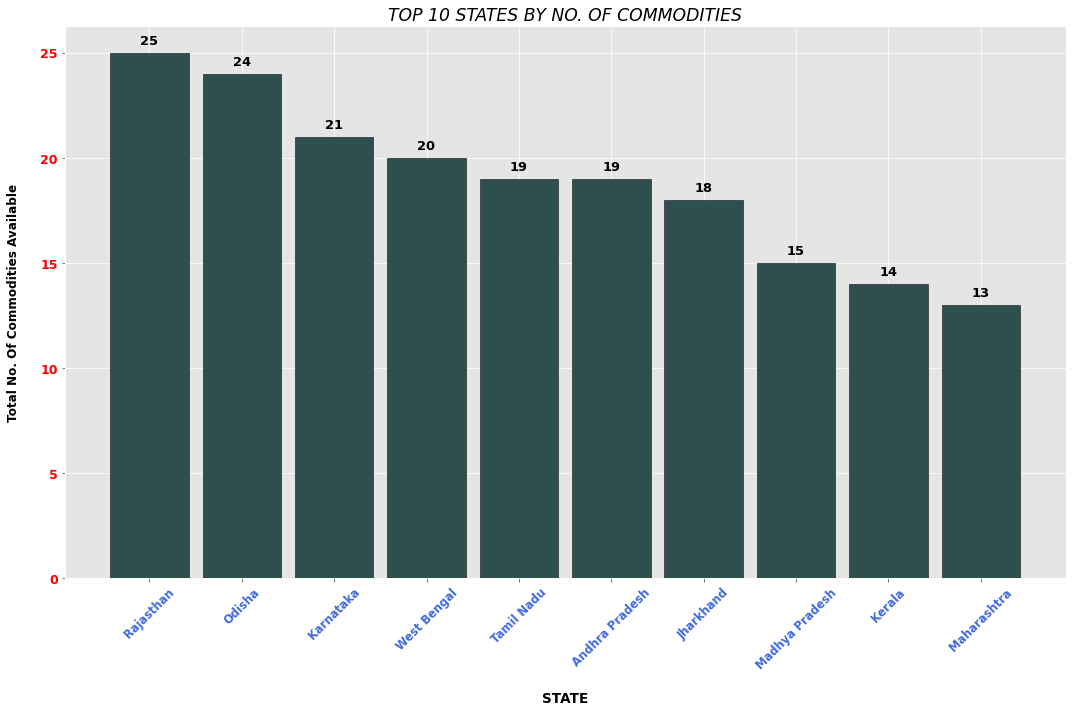

In [13]:
fig = plt.figure(figsize= (15,10))

# Creating an empty column
state_mineral_df['Total'] = ''

# Adding total no. of commdoties present in each state in empty column 
for df_len in range(len(state_mineral_df)):
    state_mineral_df.loc[df_len, 'Total'] =  len(state_mineral_df.loc[ df_len, 'Commodities Present'])

temp_df = state_mineral_df.sort_values(by= 'Total', ascending= False).reset_index()

# Slicing and Storing only the Top 10 State by total commodites no.
top5_commd_state_df = temp_df.loc[ 0:9, ['State', 'Total']]

plt.bar( x= top5_commd_state_df['State'], height= top5_commd_state_df['Total'], width= 0.85, color= 'darkslategrey', edgecolor= 'black')

# Figure customization
plt.xlabel('STATE', color = 'black', fontweight ='bold', fontsize = 13.5, labelpad= 20)
plt.ylabel('Total No. Of Commodities Available', color = 'black', fontweight ='bold', fontsize = 12, labelpad= 20)
plt.title('TOP 10 STATES BY NO. OF COMMODITIES', fontsize = 'xx-large', fontstyle =  'italic')

plt.yticks(color = 'red', fontsize= 12.5, fontweight = 'bold')
plt.xticks(color = 'royalblue', fontsize= 11.5, fontweight = 'bold', rotation= 45 )

for index, val in enumerate(top5_commd_state_df['Total']):
    plt.annotate(text= val, xy= ( index - 0.1, int(val)+0.4 ), 
                fontsize = 13, fontweight ='bold',
                color ='black' )
plt.tight_layout()

**LIST OF ALL COMMODITY**

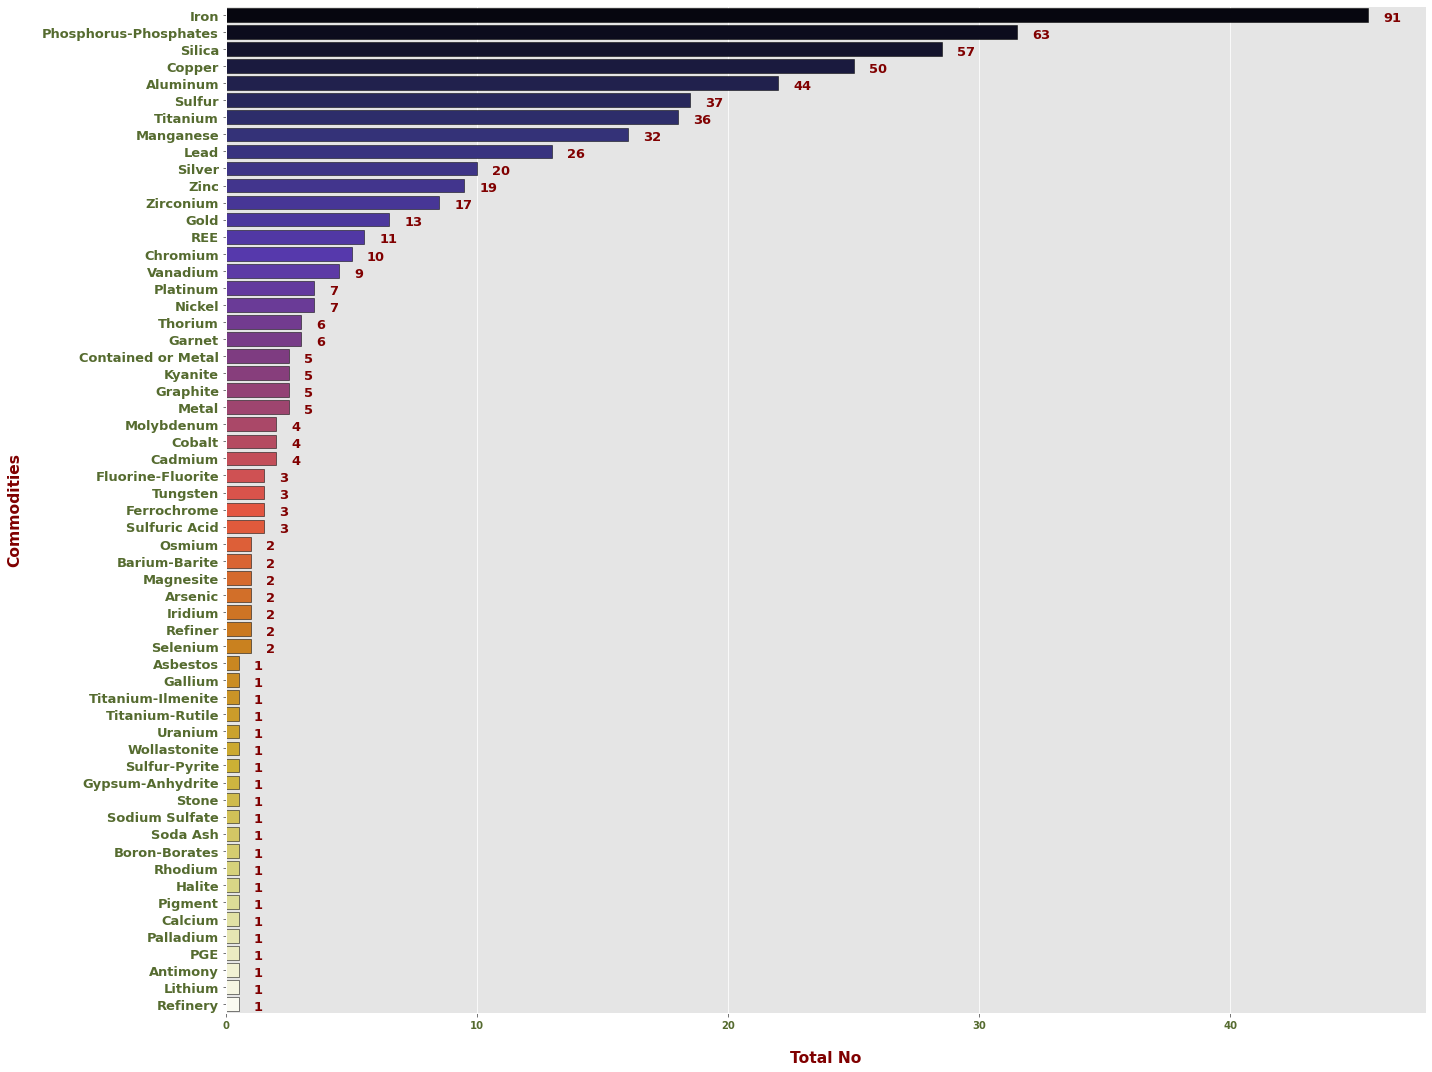

In [14]:
all_commod_list = []

for el in temp_commd_list:
    all_commod_list.append(el.strip())

temp_all_commod_df = pd.DataFrame(all_commod_list)
temp_all_commod_df.rename(columns= {0 : 'Commodities'}, inplace= True)

all_commod_df= pd.DataFrame(temp_all_commod_df.value_counts())
all_commod_df.reset_index(inplace= True)
all_commod_df.rename(columns= { 0 : 'Total'}, inplace= True)

fig, ax = plt.subplots( figsize= (20,15))

ax = sns.barplot( y= all_commod_df['Commodities'], x= all_commod_df.Total, orient= 'h', palette = "CMRmap", edgecolor= 'black')

# Figure Customization
ax.set_xlabel('Total No', color = 'maroon', fontweight ='bold', fontsize = 15.5, labelpad= 20)
ax.set_ylabel('Commodities', color = 'maroon', fontweight ='bold', fontsize = 15.5, labelpad= 20)

ax.set_yticklabels( labels= all_commod_df['Commodities'], color = 'darkolivegreen', fontsize= 13, fontweight = 'bold' )
ax.set_xticklabels( labels= [0,10,20,30,40,50,60,70,80], color = 'darkolivegreen', fontsize= 10, fontweight = 'bold' )

for index, val in enumerate(all_commod_df['Total']):
    ax.annotate(text= val, xy= (int(val) + 1.2, index + 0.35), 
                fontsize = 13, fontweight ='bold',
                color ='maroon' )

plt.tight_layout()
plt.show()

**PLOTS OF TOTAL NO OF EACH COMMODITIES PRODUCED BY EACH STATE** 

In [15]:
test_df = india_df_commod.melt(
                    id_vars= 'state',
                    value_name= 'Commodities'
                    )
test_df.drop(columns= 'variable', inplace= True)

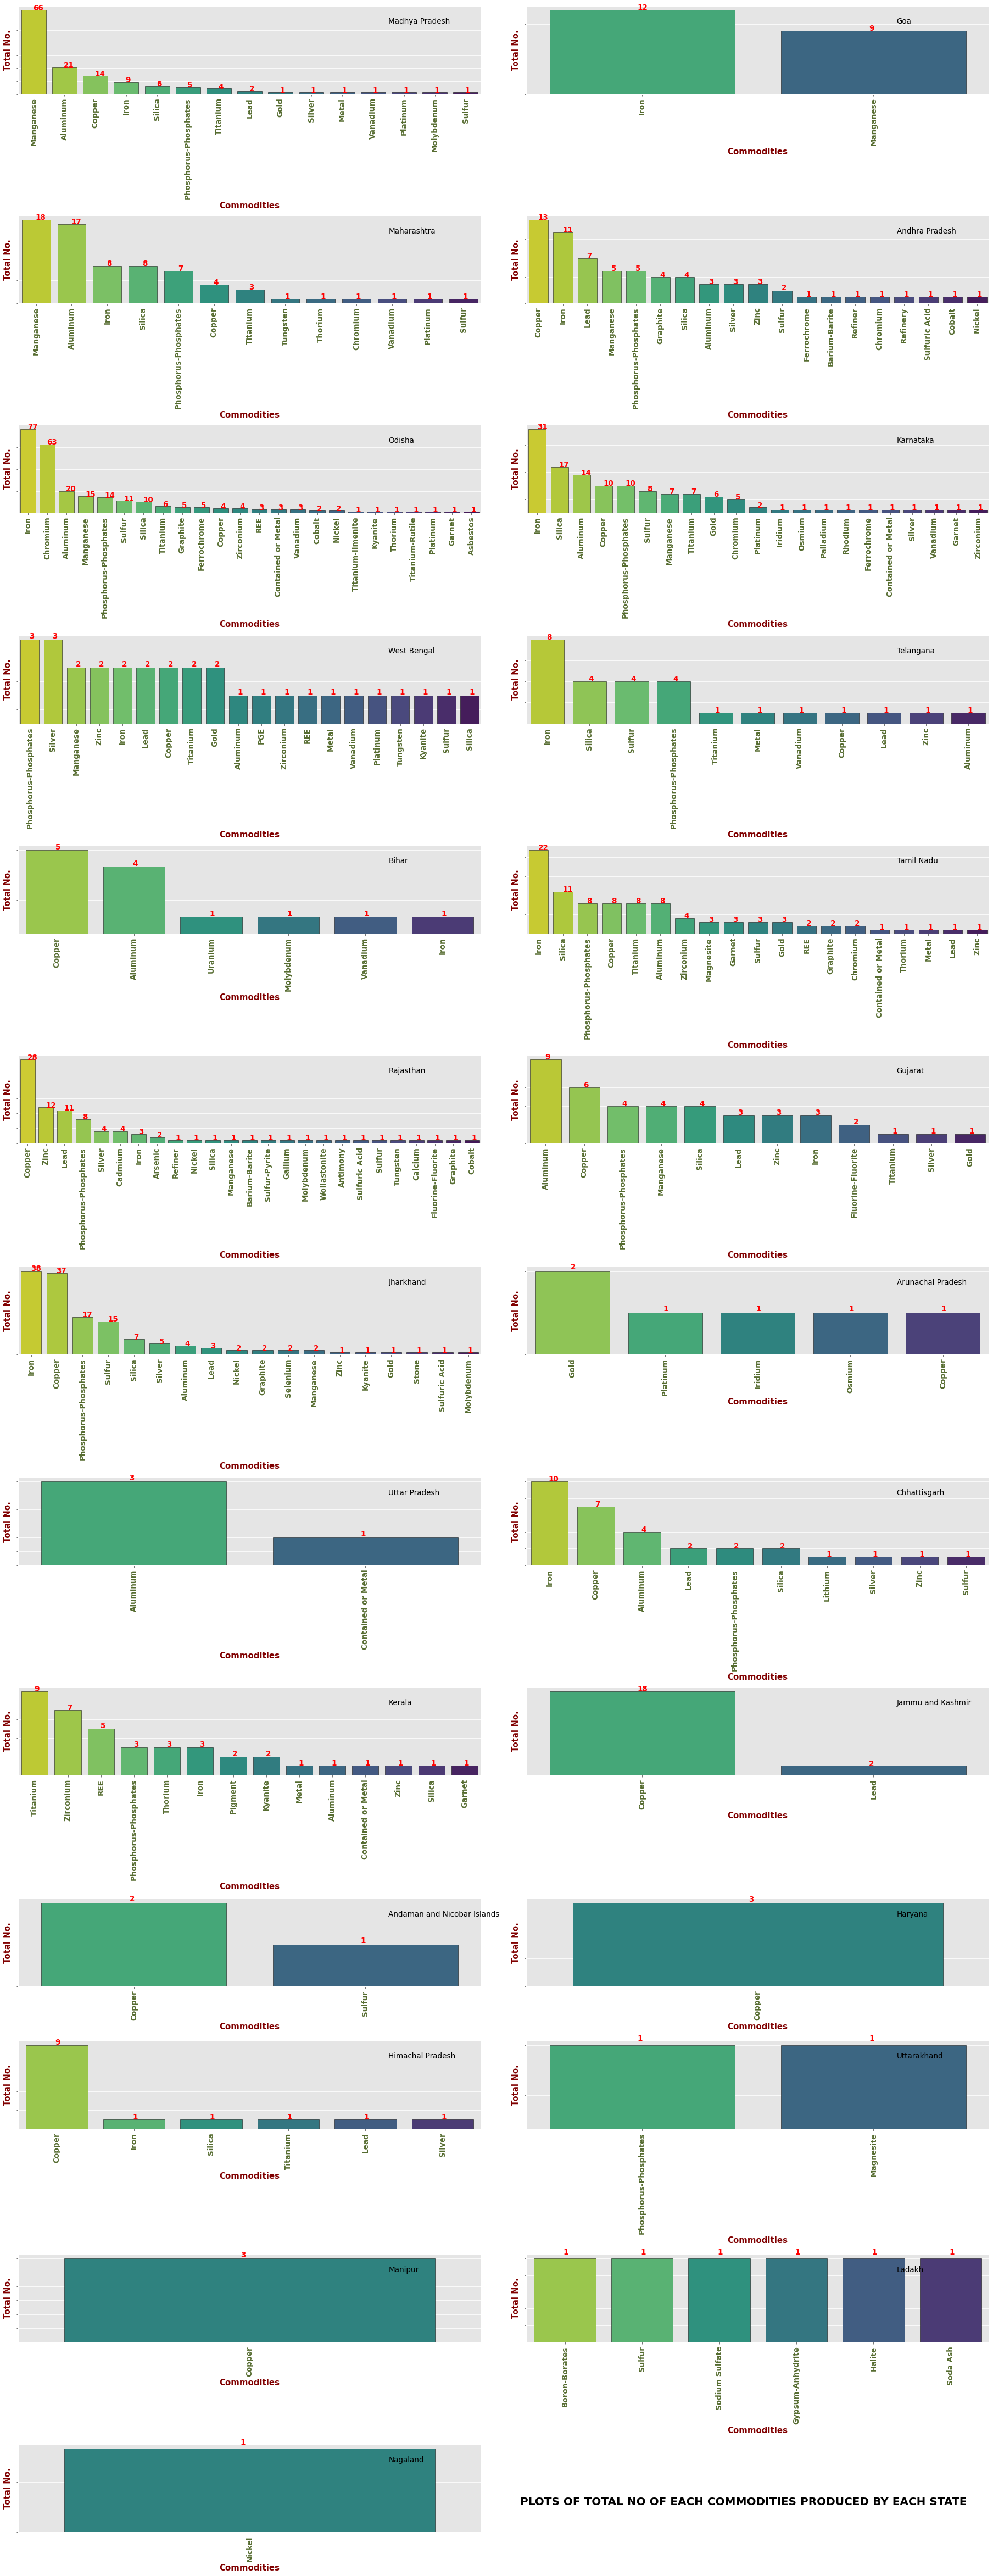

In [16]:
fig, ax = plt.subplots( 13, 2, figsize= (25,65), constrained_layout= True)
ax = ax.flatten() # Transforming  nd.Array of Axes objects into list of Axes objects 
fig.suptitle('PLOTS OF TOTAL NO OF EACH COMMODITIES PRODUCED BY EACH STATE',  x=0.75, y = 0.03, fontsize = 20,
              fontweight ="bold")

for index in range(len(state_list)):

    state_name = state_list[index]
    
    cond = test_df['state'] == state_list[index]
    temp_state_mineral_df2 = pd.DataFrame(test_df[cond])
    temp_state_mineral_df2.dropna( subset= 'Commodities', axis=0, inplace= True)

    temp_list = []
    flat_list = []

    for element in temp_state_mineral_df2.Commodities:
        if ',' in element:
            temp_list.append(element.split(','))
        else:
            temp_list.append(element)
    for element in temp_list:
            if type(element) is list:
                # do split and append
                for inside_el in element:
                    flat_list.append(inside_el.strip())
            else:
                # do only append
                flat_list.append(element.strip())

    tempSeries = pd.Series(flat_list)
    state_commod_Df= pd.DataFrame(tempSeries.value_counts(), columns= ['Total'])

    sns.barplot( y= state_commod_Df['Total'], x= state_commod_Df.index, orient= 'v', ax =ax[index], palette = "viridis_r", edgecolor  = 'black')
        
    # Plot Customization
    ax[index].set_ylabel('Total No.', color = 'maroon', fontweight ='bold', fontsize = 15)
    ax[index].set_xlabel('Commodities', color = 'maroon', fontweight ='bold', fontsize = 15)

    ax[index].set_xticklabels( labels= state_commod_Df.index, color = 'darkolivegreen', fontsize= 13.5, fontweight = 'bold', rotation= 90 )
    ax[index].set_yticklabels([])

    for ind, val in enumerate(state_commod_Df['Total']):
        ax[index].annotate( text= val, xy= (ind-0.02, int(val)+ 0.05) ,  
                    fontsize = 13.5, fontweight= 'demi',
                    color ='red', transform= ax[index].transAxes )
    ax[index].text( x= 0.8, y= 0.8, s= state_name,fontsize = 13.5, transform= ax[index].transAxes)
        
    del tempSeries, state_commod_Df, flat_list, temp_list, temp_state_mineral_df2 
ax[25].remove()

**INTERACTIVE MAPS**

In [79]:
# Creating a Temporary dataframe of all Commodties
temp_commodDf = india_df.loc[ : , ['commod1', 'commod2', 'commod3']]

# Combining all the commodties column into one 
temp_commodDf['Commodities'] = temp_commodDf['commod1'] + ',' + temp_commodDf['commod2'].astype(str) + ',' + temp_commodDf['commod3'].astype(str)

#temp_commodDf.drop(columns=['commod1', 'commod2', 'commod3'], inplace= True)
temp_commodDf.reset_index()

,index,commod1,commod2,commod3,Commodities
0,0,Manganese,NaN,NaN,"Manganese,nan,nan"
1,1,Manganese,NaN,NaN,"Manganese,nan,nan"
2,2,Manganese,NaN,NaN,"Manganese,nan,nan"
3,3,Manganese,NaN,NaN,"Manganese,nan,nan"
4,4,Manganese,NaN,NaN,"Manganese,nan,nan"
...,...,...,...,...,...
773,775,"REE, Kyanite, Thorium, Zirconium, Titanium",NaN,NaN,"REE, Kyanite, Thorium, Zirconium, Titanium,nan..."
774,776,"Thorium, Titanium, Zirconium, Garnet, REE",NaN,NaN,"Thorium, Titanium, Zirconium, Garnet, REE,nan,nan"
775,777,Vanadium,NaN,NaN,"Vanadium,nan,nan"
776,778,"Boron-Borates, Sulfur","Sodium Sulfate, Gypsum-Anhydrite, Halite, Soda...",NaN,"Boron-Borates, Sulfur,Sodium Sulfate, Gypsum-A..."


In [ ]:
temp_commodDf.drop(columns= 'index', inplace= True)

In [80]:
temp_commodDf.tail()

,commod1,commod2,commod3,Commodities
775,"REE, Kyanite, Thorium, Zirconium, Titanium",NaN,NaN,"REE, Kyanite, Thorium, Zirconium, Titanium,nan..."
776,"Thorium, Titanium, Zirconium, Garnet, REE",NaN,NaN,"Thorium, Titanium, Zirconium, Garnet, REE,nan,nan"
777,Vanadium,NaN,NaN,"Vanadium,nan,nan"
778,"Boron-Borates, Sulfur","Sodium Sulfate, Gypsum-Anhydrite, Halite, Soda...",NaN,"Boron-Borates, Sulfur,Sodium Sulfate, Gypsum-A..."
779,Nickel,NaN,NaN,"Nickel,nan,nan"


In [ ]:
list_new = []

for index, row in temp_commodDf.iterrows():
        lst = []
        lst.append(row['commod1'])
        lst.append(row['commod2'])
        lst.append(row['commod3'])

        list_new.append(lst)

        del lst

list_new

In [ ]:
allCommodList = [[x for x in y if type(x) != float or not math.isnan(x)] for y in list_new]
allCommodList

In [ ]:
Dicts = {}
for index in range(len(allCommodList)):
    
    temp_val = allCommodList[index]
    Dicts[index]= temp_val
    
Dicts

In [86]:
allCommodSeries = pd.Series(Dicts)
allCommodDf = pd.DataFrame(allCommodSeries)

allCommodDf.rename(columns= {0 :'Commodities'}, inplace= True)


In [88]:
allCommodDf.reset_index(inplace= True)

In [89]:
allCommodDf.drop(columns= ['index'], inplace= True)

In [90]:
allCommodDf.tail()

,level_0,Commodities
773,773,"[REE, Kyanite, Thorium, Zirconium, Titanium]"
774,774,"[Thorium, Titanium, Zirconium, Garnet, REE]"
775,775,[Vanadium]
776,776,"[Boron-Borates, Sulfur, Sodium Sulfate, Gypsum..."
777,777,[Nickel]


In [91]:
# Now Creating a DataFrame with Lat,Lon, site_name, state and concataning it with allCommodDf DataFrame
temp_df = india_df.loc[ : , ['site_name', 'latitude', 'longitude', 'state', 'com_type']]

temp_df.reset_index(inplace= True)

In [92]:
temp_df.drop(columns= 'index', inplace= True)

In [93]:
india_geo_df = pd.concat([temp_df, allCommodDf], axis= 1,)

india_geo_df

,site_name,latitude,longitude,state,com_type,level_0,Commodities
0,Adilabad,22.88286,79.61656,Madhya Pradesh,M,0,[Manganese]
1,Amatola,21.76615,80.11701,Madhya Pradesh,M,1,[Manganese]
2,Banjari,21.88280,80.31701,Madhya Pradesh,M,2,[Manganese]
3,Banjartola,21.95779,80.27534,Madhya Pradesh,M,3,[Manganese]
4,Barbaspur,21.79947,80.10867,Madhya Pradesh,M,4,[Manganese]
...,...,...,...,...,...,...,...
773,Chavara Deposit,9.16738,76.50041,Kerala,B,773,"[REE, Kyanite, Thorium, Zirconium, Titanium]"
774,Manavalakurichi Deposit,8.20077,77.33369,Tamil Nadu,B,774,"[Thorium, Titanium, Zirconium, Garnet, REE]"
775,Maharashtra State,21.13283,79.68365,Maharashtra,M,775,[Vanadium]
776,Puga Valley,33.91525,78.41713,Ladakh,N,776,"[Boron-Borates, Sulfur, Sodium Sulfate, Gypsum..."


In [102]:
from folium.plugins import MarkerCluster

map_obj = folium.Map( location= [23.893675959103508, 78.35449218750001], zoom_start= 5.45, tiles = 'Stamen Terrain')

marker_cluster = MarkerCluster().add_to(map_obj)

popups = folium.Popup( 'sanju')

for i,(lat,long) in enumerate(zip( india_geo_df.latitude, india_geo_df.longitude)): 
    folium.Marker(
        location = [lat,long],
        color = 'yellow',
        popup = 'Commodity:' + str(india_geo_df['Commodities'].iloc[i]) + '\n' +
                'State:' + str(india_geo_df['state'].iloc[i]) + '\n' +
                'Site Name:' + str(india_geo_df['site_name'].iloc[i]),
        radius = 10,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(marker_cluster)

map_obj